In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

### Data Understanding

In [2]:
# Load dataset
bike_sharing = pd.read_csv('day.csv')

In [3]:
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


dteday can be removed as all the necessary information given by this column is covered by yr, month and weekday

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All the columns are of proper datatype and are not having any missing values.

In [5]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1. Data in columns temp, atemp, hum, windspeed, casual, registered and cnt  are properly spread without much presence of any outliers. Mean and median for these columns are in a very close range
2. Continuous variables such as hum,windspeed, casual, registered and cnt are positive and are not having any negative values in them. Hence, there is no such data anomaly in these columns.

#### Data Validation
1. check whether the categorical variables contain only the possible values mentioned in data dictionary
2. Validate the content of columns yr and mnth with the help of dteday
3. Cross verify columns holiday and workingday
4. Check if the sum of casual and registered is equal to the content of column cnt 

In [6]:
# chcek the type of values in each categorical column
print(bike_sharing.season.value_counts())
print(bike_sharing.holiday.value_counts())
print(bike_sharing.weekday.value_counts())
print(bike_sharing.workingday.value_counts())
bike_sharing.weathersit.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


1    463
2    246
3     21
Name: weathersit, dtype: int64

Values present in all categorical columns are matching with the possible values mentioned in data dictionary.

Extract month and year from dteday column to validate columns 'yr' and 'mth'.

In [7]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing.dteday, format = '%d-%m-%Y')
year = bike_sharing.dteday.apply(lambda x: x.year)
month = bike_sharing.dteday.apply(lambda x:x.month)

In [8]:
# function to check the data in column 'yr' is correct w.r.t column 'dteday' 
mismatch_yr = True
for i in range(bike_sharing.shape[0]):
    if ((year[i] == 2018) and (bike_sharing.loc[i, 'yr'] != 0)) or ((year[i] == 2019) and (bike_sharing.loc[i, 'yr'] != 1)):
        mismatch_yr = False
print('yr == year(dteday): {0}'.format(mismatch_yr))

yr == year(dteday): True


In [9]:
# check the data in column 'mth' is correct w.r.t column 'dteday' 
(bike_sharing.mnth == month).sum()

730

1. year represented in yr column is correct as per content in dteday.
2. content of mnth column is matching with the month data present in dteday

In [10]:
# check whether weekend details are consistent throughout the weekday column
# extract weekend by checking by removing hoildays from non-working days
weekend = []
for i in range(bike_sharing.shape[0]):
    if (bike_sharing.loc[i,'workingday'] == 0) and (bike_sharing.loc[i, 'holiday'] == 0):
        weekend.append(bike_sharing.loc[i, 'weekday'])
print(set(weekend))

{0, 6}


weekdays 0 and 6 are the weekend and it is consistent throughout the dataset

In [11]:
# calculate the total demand based on casual users and registered users
total_count = bike_sharing.casual+bike_sharing.registered

In [12]:
# check whether the count received by calculation is same as the data in 'cnt' column
(bike_sharing.cnt == total_count).sum()

730

Total true cases of true cases in the result of comparison of calculated count with count given in cnt column are matching. Hence, data in column 'cnt' is mathematically correct.

#### deletion of unnecessary columns
1. instant: not necessary for analysis
2. dteday, casual, registered: these can be dropped as the data present in these columns are covered in other columns

In [13]:
# drop unnecessary columns
bike_sharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

##### target variable = demand for shared bikes, ie. column 'cnt'

#### Data Visualisation to identify the presence of linear relation of independent variables with target variable

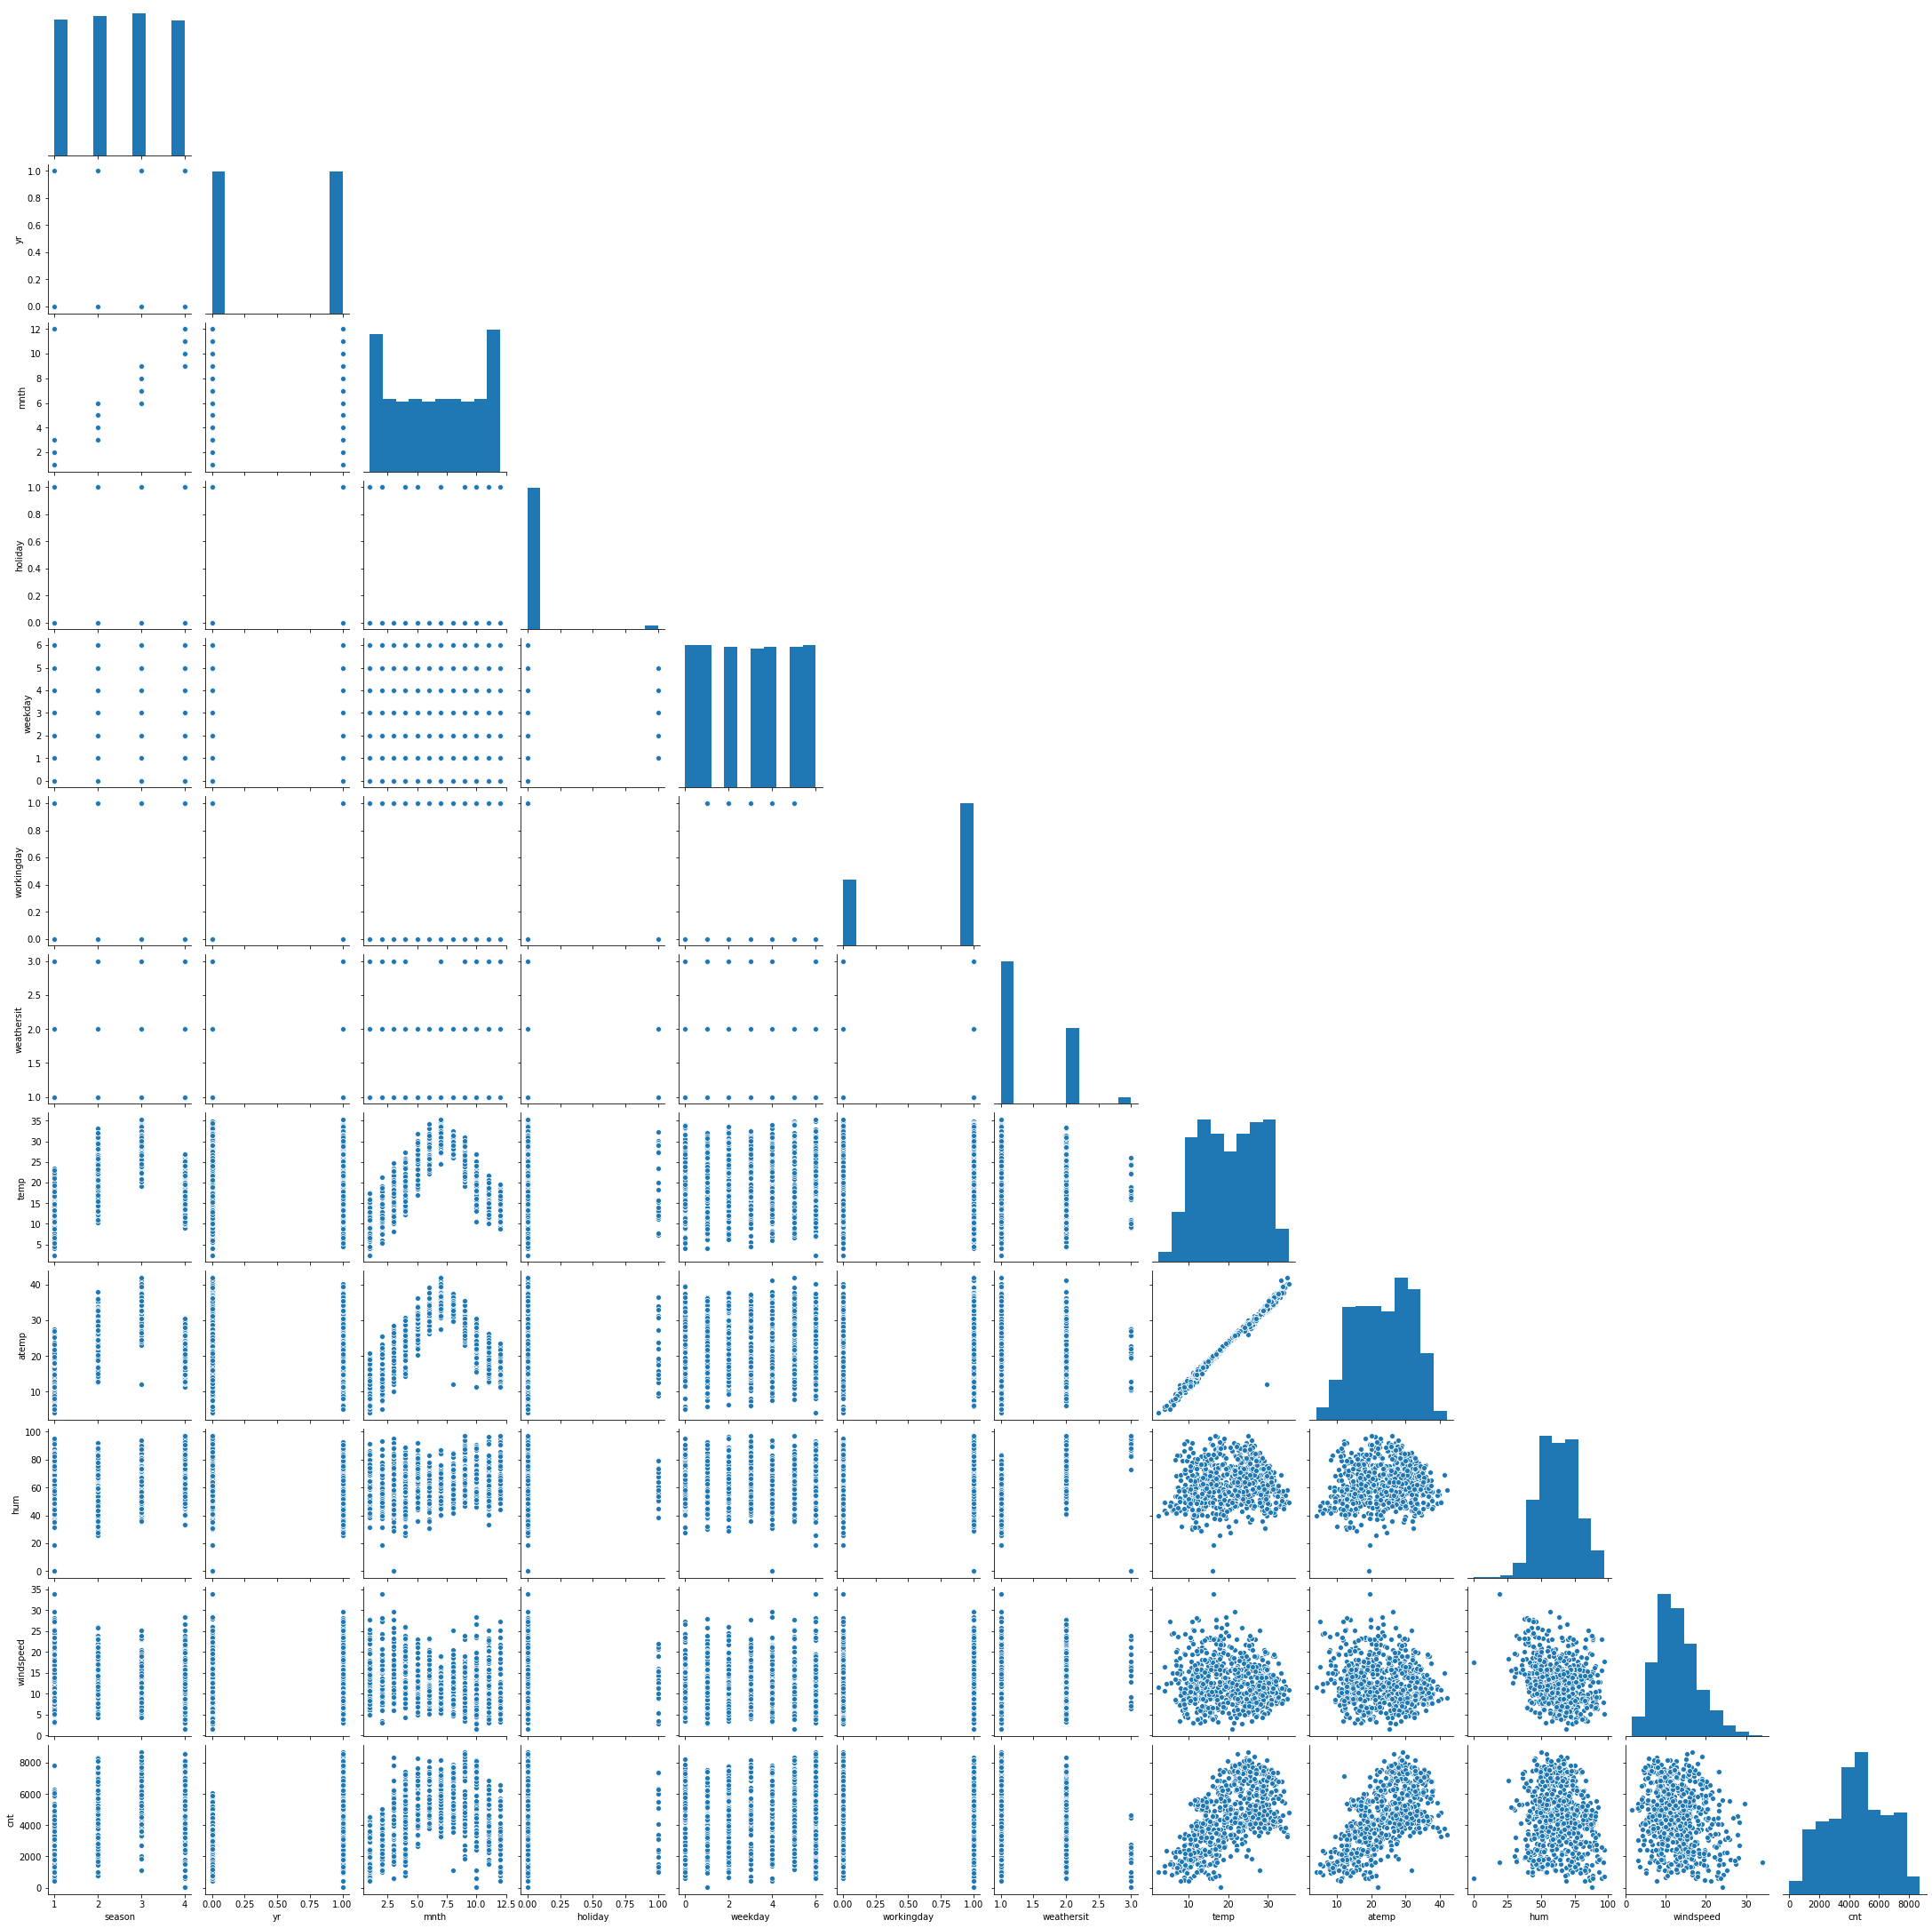

In [14]:
sns.pairplot(bike_sharing, corner = True)

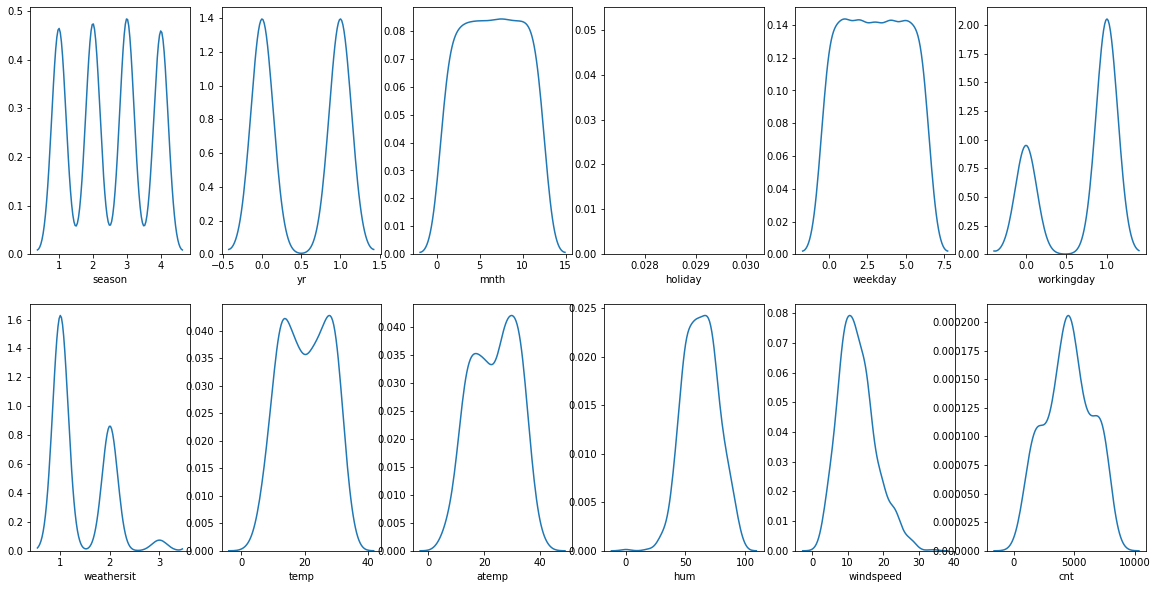

In [15]:
plt.figure(figsize = (20,10))
i =1
cols = bike_sharing.columns 
for item in cols:
    plt.subplot(2,6,i)
    sns.distplot(bike_sharing[item], hist = False)
    i =i+1

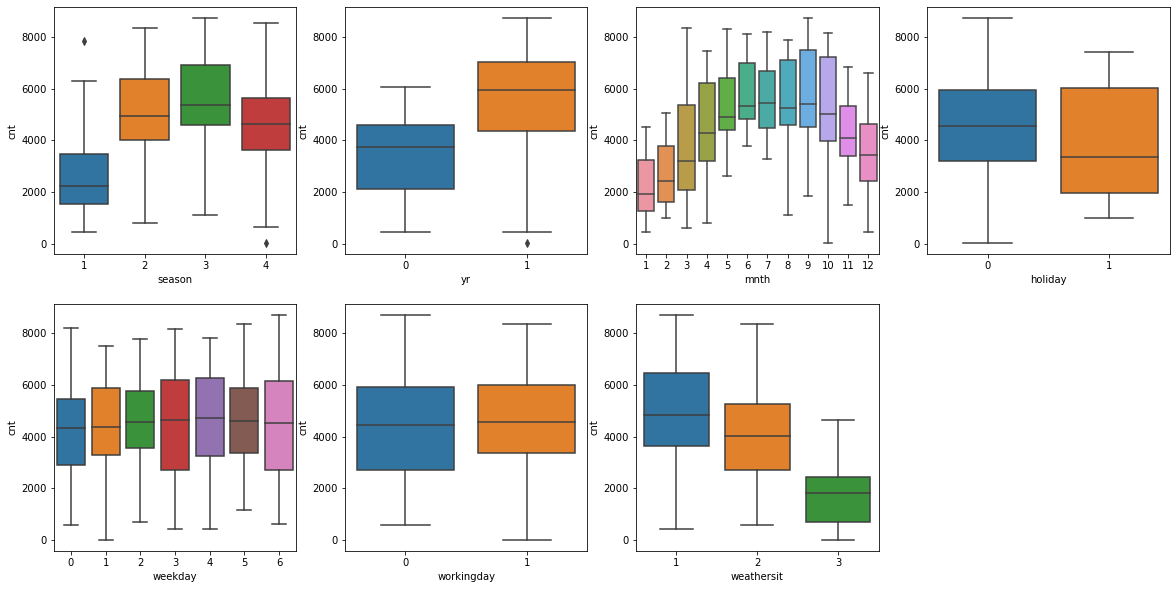

In [16]:
# boxplot for categorical variables
cate_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
plt.figure(figsize = (20,10))
i =1
for item in cate_vars:
    plt.subplot(2,4,i)
    sns.boxplot(data = bike_sharing, x= item, y = 'cnt' )
    i =i+1

Observations:
1. There is an increase in demand as season changes from spring to winter, with a slight dip in winter
2. As year moves form 2018 to 2019, demand also increases
3. There is a pattern in demand as month passes from Jan to Dec
4. Demand is high on non holidays
5. Demand decreases as the weather gets bad
6. There is a good linear relation with temp for demand
7. There is a good linear relation with atemp for demand
8. Demand is concentrated around a certain humidity range
9. Demand is not showing any visible realtion to windspeed
#### Since a few variables are showing almost linear relationship with target variable 'cnt', we can create a multiple linear regression model to analyse the driving factors of demand better

Check correlation details for the variables in dataset

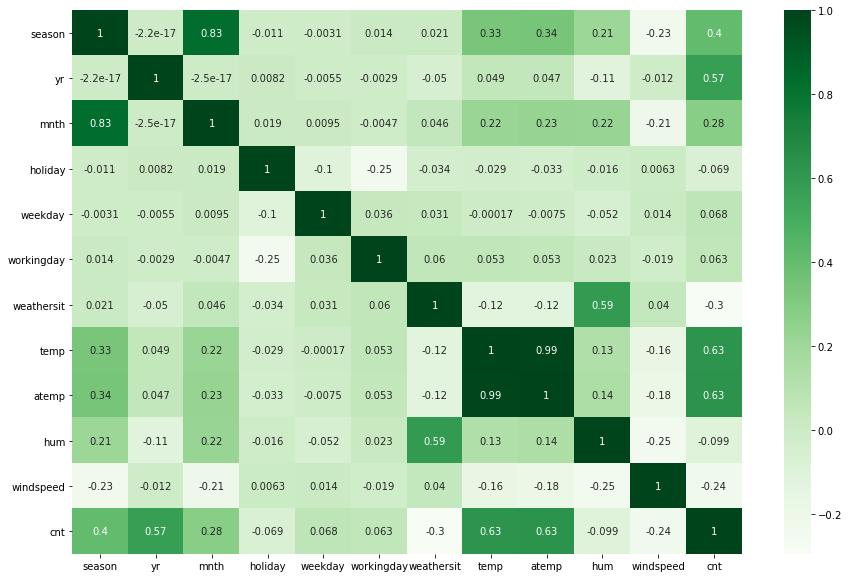

In [17]:
# check correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap = 'Greens')

There are a few variables which are highly correlated with each other.
- temp-atemp
- month-season, etc.

### Data Preparation for Modelling

#### Create dummy variables for unordered categorical variables

In [18]:
# create dummy variables
bike_dummy = pd.get_dummies(data = bike_sharing, columns = ['season', 'mnth','weekday','weathersit'], drop_first=True)

In [19]:
bike_dummy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


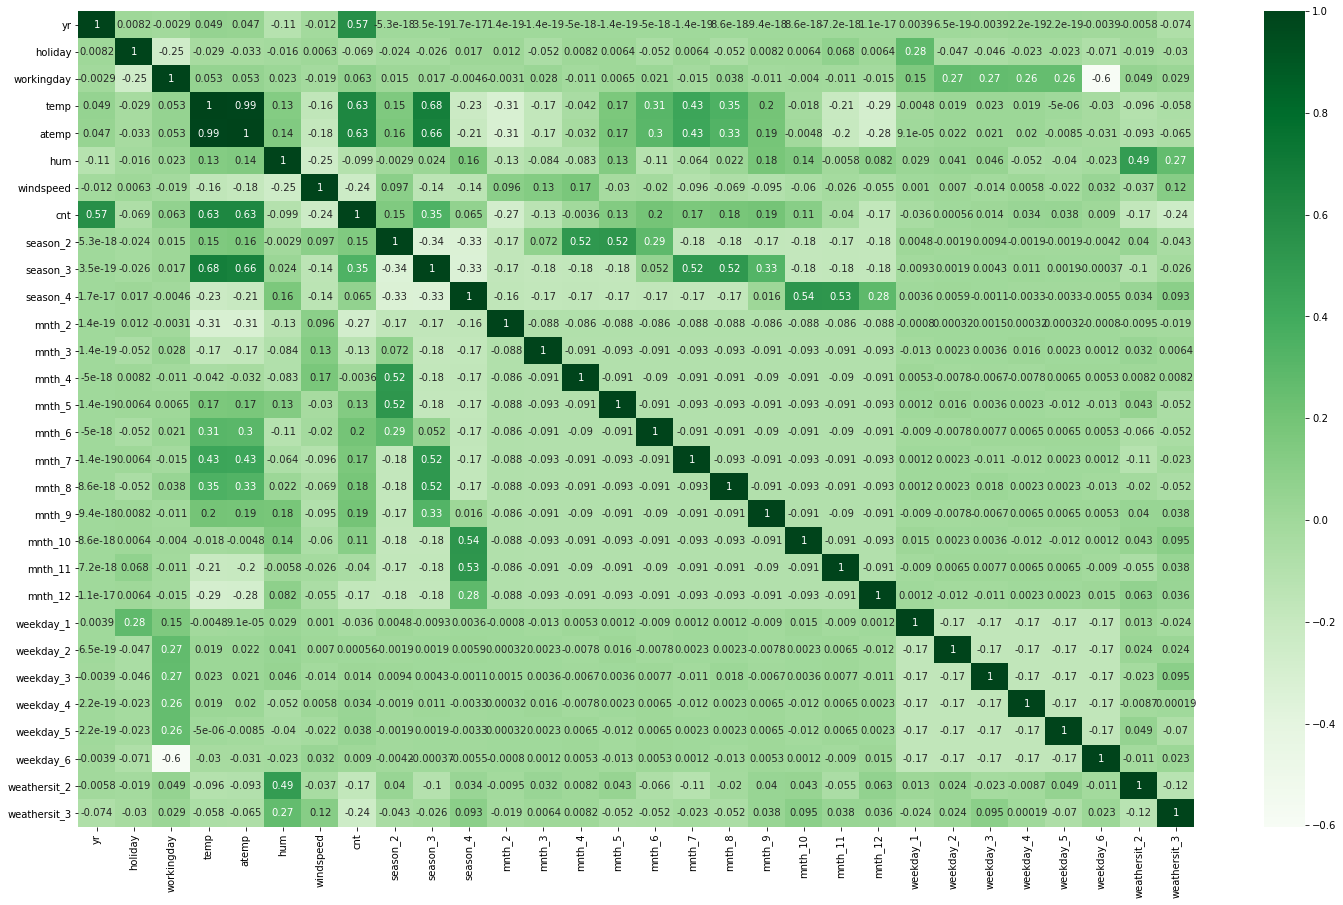

In [20]:
# recheck the correlation matrix with the newly added columns
plt.figure(figsize = (25,15))
sns.heatmap(bike_dummy.corr(), annot = True, cmap = 'Greens')

We can observe a high associating between a few varibales in the matrix

#### Create train and test data

In [21]:
# create train set with 70% of datapoints in it and test set with 30% data
bike_dummy_train, bike_dummy_test = train_test_split(bike_dummy, train_size = 0.7, test_size = 0.3, random_state =100)

In [22]:
# check the size of train dataset
bike_dummy_train.shape

(510, 30)

In [23]:
# check the size of test dataset
bike_dummy_test.shape

(219, 30)

In [24]:
bike_dummy_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Scale the train dataset before using it to train model

Normalize the columns to get all of them in same scale. Scale only the columns which are not hvaing binary content in it (0 or 1)

In [25]:
scaler = MinMaxScaler()
vars_to_scale = ['temp','atemp','hum','windspeed','cnt']
bike_dummy_train[vars_to_scale] = scaler.fit_transform(bike_dummy_train[vars_to_scale])

In [26]:
bike_dummy_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [27]:
# recheck distribution of values after scaling 
bike_dummy_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split target variable and independent variables

In [28]:
y_train = bike_dummy_train['cnt']
X_train = bike_dummy_train.drop('cnt', axis = 1)

In [29]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0


### Feature Selection using RFE
1. train a model
2. Apply RFE to get top 15 relevant features

In [31]:
# create an object for linear regression and train it on train dataset
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
# perform RFE to identify top 15 features using the trained model
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
features_sig = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
features_sig

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [33]:
# Extract the features selected by RFE
features_sel = []
for i in range(len(features_sig)):
    if features_sig[i][1] == True:
        features_sel.append(features_sig[i][0])
features_sel

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

### Model building using the selected 15 features

modify the X_train to contain only the selected 15 features

In [34]:
# update the train dataset to contain only the features selcted by RFE and add constant to the datset for model building using statsmodel
X_train_sm = X_train[features_sel]
X_train_sm = sm.add_constant(X_train_sm)

#### Mdodel 1

In [35]:
# Create an object for linear regression
lr1 = sm.OLS(y_train,X_train_sm)
# fit the model
lm1 = lr1.fit()
# check model statistics
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.89e-191
Time:                        21:33:49   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
yr               0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
hum             -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
mnth_8           0.0475      0.017      2.745      0.006       0.013       0.081
mnth_9           0.1178      0.017      6.895      0.000       0.084       0.151
mnth_10          0.0442      0.017      2.565      0.011       0.010       0.078
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Value of Rsquared represents a decent model. But there is a paremeter having p value greater than 0.05 indicating it's irrelevance to the model. Check VIF for the variables.

In [36]:
# create a dataframe to store VIF details
vif = pd.DataFrame()
vif['feature'] = X_train_sm.columns
vif['vif'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by = 'vif', ascending = False)

,feature,vif
0,const,53.480154
8,season_3,6.035483
4,temp,3.706567
7,season_2,2.597914
9,season_4,2.172747
5,hum,1.913920
3,workingday,1.881504
13,weekday_6,1.785887
10,mnth_8,1.683438
14,weathersit_2,1.575021


Drop parameter season_3 as it has high p value. We can see its VIF is greater than 5 as well. Rebuild the model and check its performance.

In [37]:
# drop season_3 from train set
X_train_sm = X_train_sm.drop('season_3', axis =1)
features_sel.remove('season_3')
features_sel

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_4',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

#### Model 2

In [38]:
# Create an object for linear regression
lr2 = sm.OLS(y_train,X_train_sm)
# fit the model
lm2 = lr2.fit()
# check model statistics
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.24e-192
Time:                        21:33:49   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model shows a good R2, adjusted R2, F statistics, etc. And p values of all variables are less than 0.05, implying all the parameters used to train the model are relevant ones. So this is a good model. 

But we can see that Adjusted R squared is same for model 1 and model 2. So let's check the exact values to see the dip in adjusted R2 after dropping 1 variable

In [39]:
# check adjusted R2 with a precision more than 3 digits for Model 2
lm2.rsquared_adj

0.843860197242704

In [40]:
# check adjusted R2 with a precision more than 3 digits for Model 1
lm1.rsquared_adj

0.844115516563939

We can see that the drop in adjusted r squared is very less for model 2 compared to model 1. Also, Rsquared remains almost the same in both the models indicating thaat the dropped paraemeter was not having much relevance to the demand in bike share.

Let's check VIF details for independent variables.

In [41]:
# create a dataframe and store VIF details
vif = pd.DataFrame()
vif['feature'] = X_train_sm.columns
vif['vif'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by = 'vif', ascending = False)

,feature,vif
0,const,53.472439
3,workingday,1.880895
5,hum,1.877100
12,weekday_6,1.785192
8,season_4,1.718920
4,temp,1.589856
13,weathersit_2,1.567673
11,mnth_10,1.492794
9,mnth_8,1.457135
7,season_2,1.381015


#### Adjusted R squared are approximately equal for both the models. There is only very negligible drop in Adjusted R squared for second model compared to first model. This indicates that the dropped parameter, season_3, was not adding any significant value to the model
#### TModel 2 is able to explain almost 85% of variation in the datset which is a pretty good value. All the parameters in the model are relevant ones as the p vlaues are less than 0.05 for all of them. 
#### VIF, indicating multicollinearity, for these variables are less than 5, thus providing reliability to coefficients of parameters given by the model.
#### Also, we can see that probablity of F statistics is close to 0, hence we can say that the overall model fit is significant, not just by chance.

### Residual analysis to verify assumptions

Calculate residuals for the preditcted values for train dataset

In [42]:
# predict y values for x_train data and calculate residuals
y_train_pred = lm2.predict(X_train_sm)
res = y_train - y_train_pred

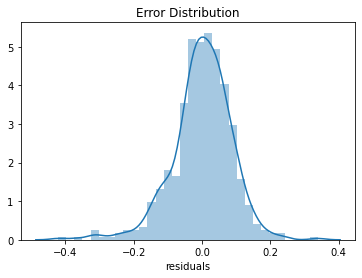

In [43]:
# check the distribution of error terms
plt.title('Error Distribution')
plt.xlabel('residuals')
sns.distplot(res)

Residuals are normally distributed and are centered around 0. Hence theassumption on distribution of error terms for linear regression is valid in this case.

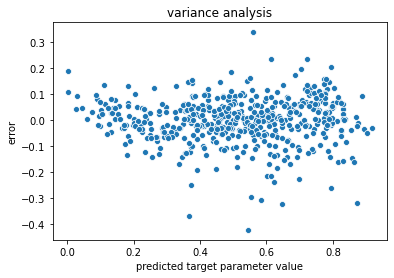

In [44]:
# check how residuals are distributed w.r.t predicted values
plt.title('variance analysis')
plt.ylabel('error')
plt.xlabel('predicted target parameter value')
sns.scatterplot(x = y_train_pred, y =res )

Error terms are not showing any significant, unexpected pattern w.r.t the predicted values. However, it is more concentrated towards the right region of the plot. 
Hence, we can conclude that the assumption on having constant variance is also met by the model.

### Prediction on test datset
#### Perform prediction on test data to analyse the consistency and reliability in the model
1. perform necessary preprocessing on test dataset - dropping columns,scaling, adding constant, etc.
2. Predict target variable using the trained model
3. Calculate R squared for test dataset on the model and comapre it with value got for train set

In [45]:
# Scale test data using the scaler which was fit on train data
bike_dummy_test[vars_to_scale] = scaler.transform(bike_dummy_test[vars_to_scale])
bike_dummy_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Create X_test and y_test, Drop the columns which were found to be irrelvant using RFE
X_test = bike_dummy_test[features_sel]
y_test = bike_dummy_test['cnt']
# add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [47]:
# check the test dataset
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,1,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0


In [48]:
# check test set for y values
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [49]:
# predict count for the test data using model 2
y_test_pred = lm2.predict(X_test_sm)

Text(0, 0.5, 'predicted demand')

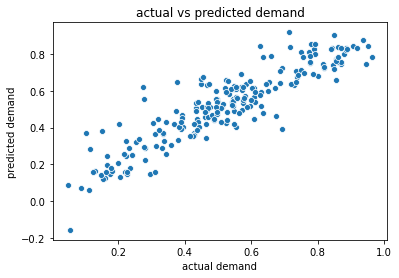

In [50]:
# check the distribution of predicted value of count with actual count data in column cnt
plt.title('actual vs predicted demand')
sns.scatterplot(x = y_test, y = y_test_pred)
plt.xlabel('actual demand')
plt.ylabel('predicted demand')

In [51]:
# calculate R squared for model using test data
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.8139594321774225

#### R squared value of model in test data is 81%, it was almost 85% for train data. So this confirms that the model behave well even on unseen data. Hence this model (model 2) is a reliable model with high coverage of datapoints. 

#### Let's try the model building using standard scaling method to see whether it gives better performance compared to earlier models.

In [52]:
# perpare train and test datset
bike_train, bike_test = train_test_split(bike_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
# use standard scaler to scale non-binary columns
scaler = StandardScaler()
bike_train[vars_to_scale] = scaler.fit_transform(bike_train[vars_to_scale])

In [54]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.687393e-16,4.193813e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# separate target nad independent variables
X_train = bike_train.drop('cnt', axis =1)
y_train = bike_train['cnt']

In [56]:
# train a model and perform RFE to identify features of high importance 
lr_rfe = LinearRegression()
lr_rfe.fit(X_train, y_train)
# choose top 15 independent variables
rfe_std = RFE(lr_rfe, 15)
rfe_std.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [57]:
# check top15 features
features_rfe = list(zip(X_train.columns, rfe_std.support_, rfe_std.ranking_))
features_rfe

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 5),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [58]:
# extract the top 15 features
features_sel = []
for i in range(len(features_rfe)):
    if features_rfe[i][1] == True:
        features_sel.append(features_rfe[i][0])
features_sel

['yr',
 'holiday',
 'workingday',
 'temp',
 'season_2',
 'season_3',
 'season_4',
 'mnth_3',
 'mnth_5',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

In [59]:
# update the train dataset to contain only the selected features
X_train = X_train[features_sel]
X_train.head()

,yr,holiday,workingday,temp,season_2,season_3,season_4,mnth_3,mnth_5,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,0,1,-0.121335,0,0,1,0,0,0,0,1,0,0,0
576,1,0,1,1.231731,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,-0.420478,0,0,0,1,0,0,0,0,1,1,0
728,1,0,0,-1.294913,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,1,0,0,0,0,0,0,0,1,1,0


#### Model 3

In [60]:
# build the model using selected features
X_train_sm = sm.add_constant(X_train)
lr3 = sm.OLS(y_train, X_train_sm)
lm3 = lr3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          7.94e-181
Time:                        21:33:50   Log-Likelihood:                -267.46
No. Observations:                 510   AIC:                             566.9
Df Residuals:                     494   BIC:                             634.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0136      0.076    -13.386      0.000      -1.162      -0.865
yr               1.0418      0.037     27.946      0.000       0.969       1.115
holiday         -0.2340      0.126     -1.858      0.064      -0.482       0.014
workingday       0.2100      0.054      3.897      0.000       0.104       0.316
temp             0.4634      0.035     13.168      0.000       0.394       0.533
season_2         0.5218      0.071      7.298      0.000       0.381       0.662
season_3         0.2917      0.106      2.765      0.006       0.084       0.499
season_4         0.7126      0.065     10.988      0.000       0.585       0.840
mnth_3           0.1284      0.068      1.885      0.060      -0.005       0.262
mnth_5           0.1332      0.082      1.627      0.104      -0.028       0.294
mnth_8           0.1953      0.081      2.418      0.016       0.037       0.354
mnth_9           0.5025      0.079      6.338      0.000       0.347       0.658
mnth_10          0.1782      0.081      2.205      0.028       0.019       0.337
weekday_6        0.2462      0.068      3.632      0.000       0.113       0.379
weathersit_2    -0.3760      0.040     -9.419      0.000      -0.454      -0.298
weathersit_3    -1.3940      0.112    -12.421      0.000      -1.615      -1.173
==============================================================================
Omnibus:                       89.280   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.219
Skew:                          -0.816   Prob(JB):                     2.84e-60
Kurtosis:                       6.200   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 3 is able to explain 83% of variation in the dataset which is pretty good. But we can see that there is a variable 'mnth_5' which is statistically not significant to the model but is used in training the model. So let's drop this parameter and check the model performance.

#### Model 4

In [61]:
#Drop mnth_5
X_train_sm.drop('mnth_5', axis =1, inplace = True)

In [62]:
# train the model on new train dataset and check the performance
lr4 = sm.OLS(y_train, X_train_sm)
lm4 = lr4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.19e-181
Time:                        21:33:50   Log-Likelihood:                -268.82
No. Observations:                 510   AIC:                             567.6
Df Residuals:                     495   BIC:                             631.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9947      0.075    -13.272      0.000      -1.142      -0.847
yr               1.0378      0.037     27.853      0.000       0.965       1.111
holiday         -0.2394      0.126     -1.898      0.058      -0.487       0.008
workingday       0.2110      0.054      3.911      0.000       0.105       0.317
temp             0.4757      0.034     13.816      0.000       0.408       0.543
season_2         0.5490      0.070      7.885      0.000       0.412       0.686
season_3         0.2591      0.104      2.497      0.013       0.055       0.463
season_4         0.7011      0.065     10.858      0.000       0.574       0.828
mnth_3           0.1064      0.067      1.591      0.112      -0.025       0.238
mnth_8           0.1945      0.081      2.405      0.017       0.036       0.353
mnth_9           0.5028      0.079      6.332      0.000       0.347       0.659
mnth_10          0.1716      0.081      2.123      0.034       0.013       0.330
weekday_6        0.2431      0.068      3.583      0.000       0.110       0.376
weathersit_2    -0.3708      0.040     -9.303      0.000      -0.449      -0.292
weathersit_3    -1.3951      0.112    -12.410      0.000      -1.616      -1.174
==============================================================================
Omnibus:                       86.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.623
Skew:                          -0.806   Prob(JB):                     3.78e-55
Kurtosis:                       6.033   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 4 is able to explain 83% of variation in the dataset which is pretty good. But we can see that there is a variable 'mnth_3' which is statistically not significant (p value > 0.05) to the model but is used in training the model. So let's drop this parameter and check the model performance.

#### Model 5

In [63]:
#drop mnth_3
X_train_sm.drop('mnth_3', axis =1, inplace =True)

In [64]:
# train the model on new train dataset and check the performance
lr5 = sm.OLS(y_train, X_train_sm)
lm5 = lr5.fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.50e-182
Time:                        21:33:50   Log-Likelihood:                -270.12
No. Observations:                 510   AIC:                             568.2
Df Residuals:                     496   BIC:                             627.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9676      0.073    -13.236      0.000      -1.111      -0.824
yr               1.0380      0.037     27.816      0.000       0.965       1.111
holiday         -0.2482      0.126     -1.966      0.050      -0.496      -0.000
workingday       0.2148      0.054      3.977      0.000       0.109       0.321
temp             0.4779      0.034     13.870      0.000       0.410       0.546
season_2         0.5336      0.069      7.727      0.000       0.398       0.669
season_3         0.2261      0.102      2.220      0.027       0.026       0.426
season_4         0.6725      0.062     10.827      0.000       0.550       0.795
mnth_8           0.1945      0.081      2.401      0.017       0.035       0.354
mnth_9           0.5031      0.080      6.327      0.000       0.347       0.659
mnth_10          0.1697      0.081      2.097      0.037       0.011       0.329
weekday_6        0.2474      0.068      3.643      0.000       0.114       0.381
weathersit_2    -0.3716      0.040     -9.308      0.000      -0.450      -0.293
weathersit_3    -1.3867      0.112    -12.330      0.000      -1.608      -1.166
==============================================================================
Omnibus:                       84.596   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.478
Skew:                          -0.774   Prob(JB):                     7.45e-57
Kurtosis:                       6.125   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 5 is able to explain 83% of variation in the dataset which is pretty good. But we can see that there is a variable 'holiday' which is statistically not significant to the model (p value = 0.05) but is used in training the model. So let's drop this parameter and check the model performance.

#### Model 6

In [65]:
#drop mnth_3
X_train_sm.drop('holiday', axis =1, inplace =True)

In [66]:
# train the model on new train dataset and check the performance
lr6 = sm.OLS(y_train, X_train_sm)
lm6 = lr6.fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.58e-182
Time:                        21:33:50   Log-Likelihood:                -272.10
No. Observations:                 510   AIC:                             570.2
Df Residuals:                     497   BIC:                             625.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0087      0.070    -14.358      0.000      -1.147      -0.871
yr               1.0388      0.037     27.759      0.000       0.965       1.112
workingday       0.2516      0.051      4.955      0.000       0.152       0.351
temp             0.4781      0.035     13.835      0.000       0.410       0.546
season_2         0.5398      0.069      7.803      0.000       0.404       0.676
season_3         0.2327      0.102      2.280      0.023       0.032       0.433
season_4         0.6716      0.062     10.782      0.000       0.549       0.794
mnth_8           0.1944      0.081      2.393      0.017       0.035       0.354
mnth_9           0.4941      0.080      6.205      0.000       0.338       0.651
mnth_10          0.1760      0.081      2.169      0.031       0.017       0.335
weekday_6        0.2847      0.065      4.352      0.000       0.156       0.413
weathersit_2    -0.3695      0.040     -9.234      0.000      -0.448      -0.291
weathersit_3    -1.3829      0.113    -12.263      0.000      -1.604      -1.161
==============================================================================
Omnibus:                       86.824   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.138
Skew:                          -0.791   Prob(JB):                     5.95e-59
Kurtosis:                       6.180   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 6 is able to explain 83% of variation in the dataset which is pretty good.

#### But comparing all the 6 models using Rsquared, adjusted R squared, p values and VIF, we can say Model 2 is the best fit. Also the relevant features as per model 2 makes more sense than Model 6. for example, it makes more sense to have humidity or holiday to have an impact in bike demand. But these variables are dropped in Model 6.

#### Statistics of the selected model

In [67]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.24e-192
Time:                        21:33:50   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model follows all the assumptions for linear regression and is performing very well on unseen data as verified in previous steps.

#### Equation for best fitted line is:
cnt = 0.1945 + 0.2292*yr - 0.0558*holiday + 0.0444*workingday + 0.5301*temp - 0.1692*hum - 0.1857*windspeed + 0.1039*season_2 + 0.1348*season_4 + 0.0560*mnth_8 + 0.1255*mnth_9 + 0.0411*mnth_10 + 0.0529*weekday_6 - 0.0582*weathersit_2 - 0.2486*weathersit_3

#### Top 3 features / parameters driving the demand in bike sharing
1. temp
2. weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
3. year